### libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# For MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from fancyimpute import IterativeImputer
# for progress bar
from tqdm import tqdm

# 1. Import data

In [4]:
# Define column names (since UCI does not provide them)
feature_columns = [f"feature_{i}" for i in range(590)]  # 590 features

# Load features
secom_features = pd.read_csv(
    "../secom/secom.data", 
    sep=" ", 
    names=feature_columns, 
    header=None, 
    engine='python'
)

In [5]:
# Load labels
secom_labels = pd.read_csv(
    "../secom/secom_labels.data", 
    sep=" ", 
    header=None, 
    usecols=[0]  # Only the first column contains the label
)

In [6]:
# Rename label column
secom_labels.columns = ["Label"]

# Convert labels: -1 (pass) -> 0, 1 (fail) -> 0
secom_labels["Label"] = secom_labels["Label"].replace({-1: 0, 1: 1})

# Combine features and labels into a single DataFrame
secom_data = pd.concat([secom_features, secom_labels], axis=1)

In [7]:
secom_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


# 2. Baseline Dummy Model

## X / Y = data / label

In [8]:
# Load the dataset (assuming 'secom_data' is already prepared)
X = secom_data.drop(columns=["Label"])  # Features
y = secom_data["Label"]  # Target variable

## Train / Test Splits

In [9]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Create / train dummy classifier

In [10]:
# Create the Dummy Classifier (using "most_frequent" strategy)
dummy_clf = DummyClassifier(strategy="most_frequent")  # Always predicts the majority class

# Train the dummy classifier
dummy_clf.fit(X_train, y_train)

# Make predictions
y_pred_dummy = dummy_clf.predict(X_test)

## Evaluate Dummy Classifier

In [11]:
# Evaluate the Dummy Classifier
accuracy = accuracy_score(y_test, y_pred_dummy)
precision = precision_score(y_test, y_pred_dummy, zero_division=0)
recall = recall_score(y_test, y_pred_dummy)
f1 = f1_score(y_test, y_pred_dummy)
conf_matrix = confusion_matrix(y_test, y_pred_dummy)
classification_rep = classification_report(y_test, y_pred_dummy)

# Display results
print("=== Dummy Classifier Evaluation ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

=== Dummy Classifier Evaluation ===
Accuracy: 0.9331
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Confusion Matrix:
 [[293   0]
 [ 21   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Initialize LR, RF, & XGB

In [12]:
def train_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")

    # Print Results
    print(f"--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*40 + "\n")

    return accuracy, precision, recall, f1


## LR_00

In [13]:
log_reg_00 = LogisticRegression(max_iter=500, random_state=42)
log_reg_results = train_evaluate_model(log_reg_00, "Logistic Regression")

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## RF_00

In [14]:
rf_clf_00 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_results = train_evaluate_model(rf_clf_00, "Random Forest Classifier")

--- Random Forest Classifier Results ---
Accuracy: 0.9331
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Confusion Matrix:
[[293   0]
 [ 21   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314


----------------------------------------



/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_

## XGB_00

In [15]:
xgb_clf_00 = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_results = train_evaluate_model(xgb_clf_00, "XGBoost Classifier")

--- XGBoost Classifier Results ---
Accuracy: 0.9331
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Confusion Matrix:
[[293   0]
 [ 21   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314


----------------------------------------



/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_

# Handle Missing data

In [16]:
# Check for missing values
print(secom_data.isna().sum().sum(), "missing values found")

41951 missing values found


<AxesSubplot:>

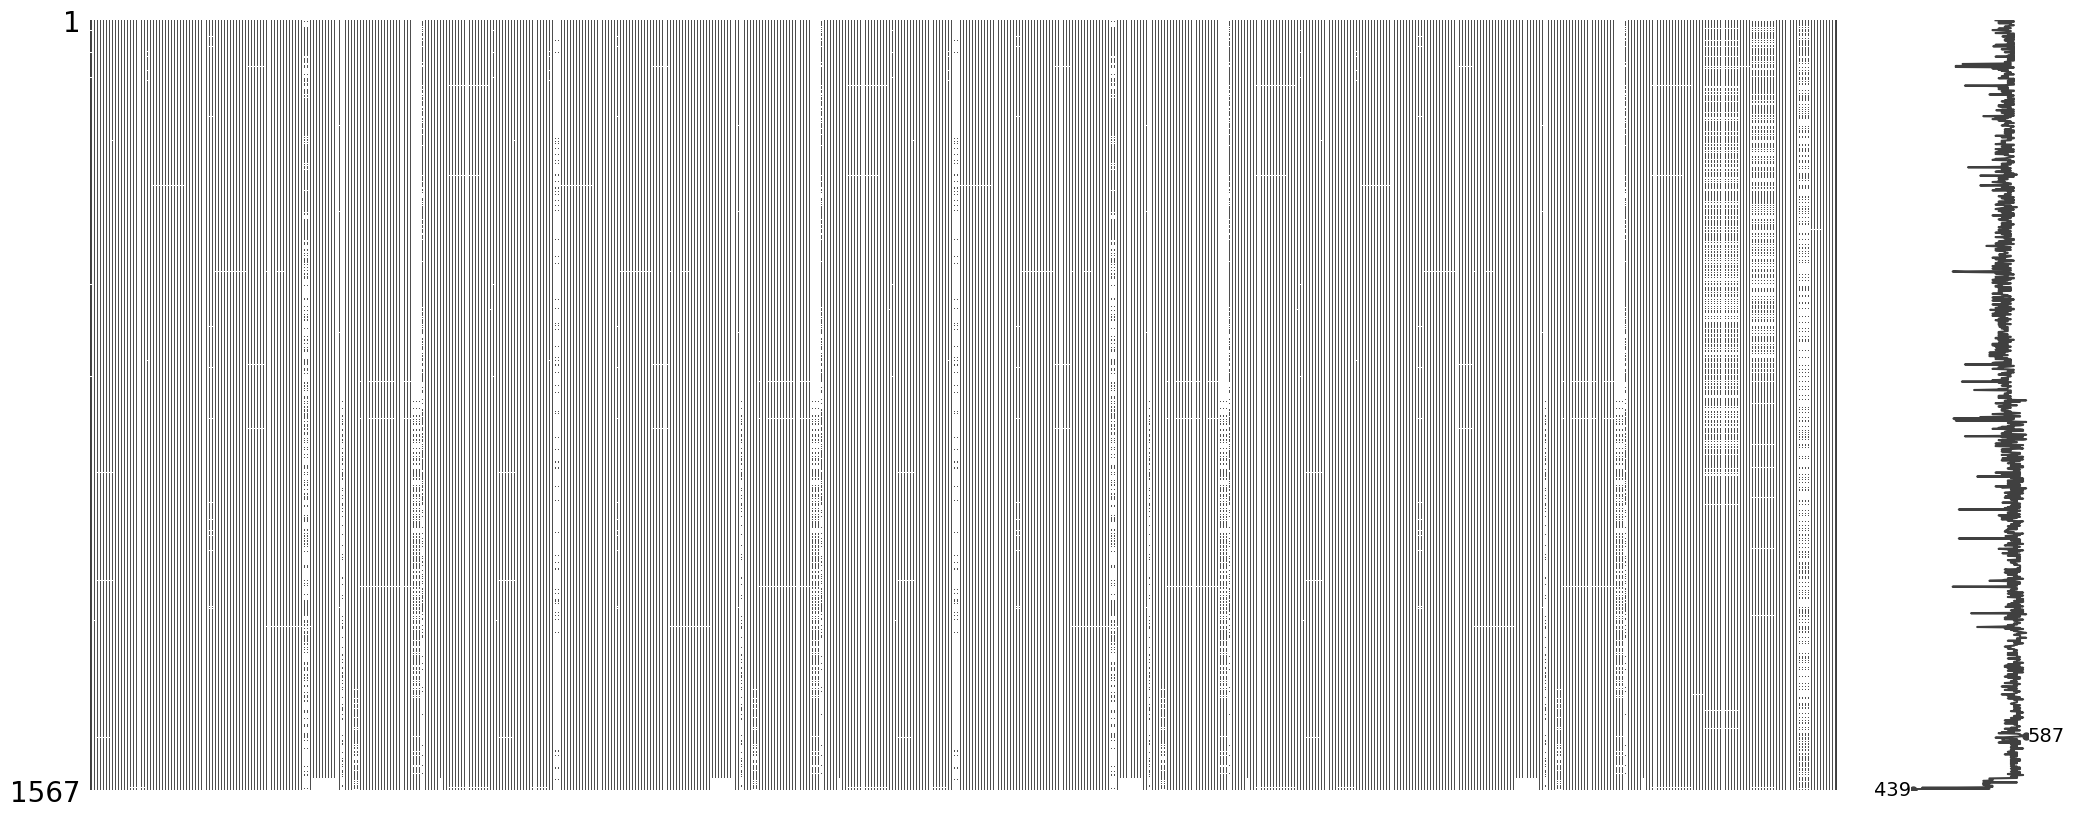

In [17]:
msno.matrix(secom_data)

In [18]:
secom_data.shape
print(1567*591)

926097


we can see that data is missing in clusters column-wise

**Next Steps**

1. Handling Missing Values:

    - Drop columns with too many missing values.
    - Impute missing values using the mean, median, or KNN imputation.
2. Feature Selection & Engineering:

    - Use PCA (Principal Component Analysis) to reduce dimensionality.
    - Use correlation analysis to drop redundant features.
3. Class Imbalance Handling:

    - Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance classes.
4. Model Building:

    - Train classifiers like Logistic Regression, Random Forest, XGBoost, or Neural Networks.

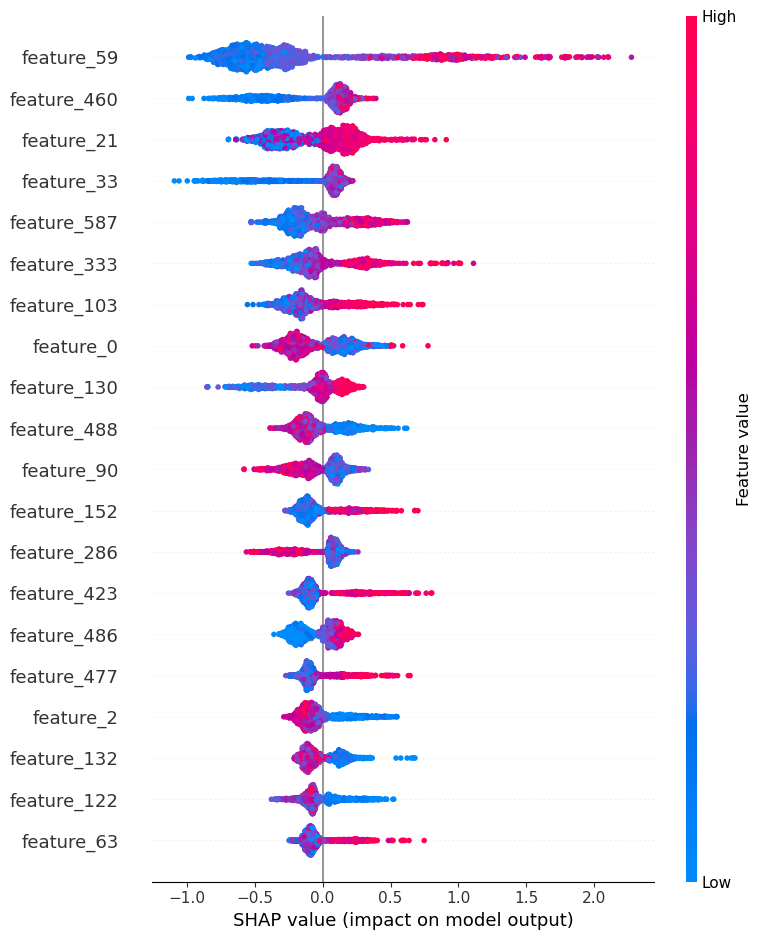

In [19]:
import shap
import xgboost
import pandas as pd

# Load dataset
X, y = secom_data.drop(columns=["Label"]), secom_data["Label"]

# Train an XGBoost model
model = xgboost.XGBClassifier().fit(X, y)

# Create SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot to visualize feature importance
shap.summary_plot(shap_values, X)

## Identify missing pecentage for each column

In [21]:
# Calculate the percentage of missing values for each column in feature_columns
missing_percentage = (secom_data[feature_columns].isnull().sum() / len(secom_data)) * 100

# Convert to a DataFrame for better readability
missing_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort by highest missing values
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Display the results
#tools.display_dataframe_to_user(name="Missing Values Percentage", dataframe=missing_df)
display(missing_df)

,Column,Missing Percentage
157,feature_157,91.193363
292,feature_292,91.193363
293,feature_293,91.193363
158,feature_158,91.193363
492,feature_492,85.577537
...,...,...
251,feature_251,0.000000
252,feature_252,0.000000
254,feature_254,0.000000
255,feature_255,0.000000


In [22]:
# Count columns with more than 20% missing values
num_missing_above_20 = (missing_df['Missing Percentage'] > 20).sum()

print(f"Number of columns missing more than 20% of values: {num_missing_above_20}")

Number of columns missing more than 20% of values: 32


In [23]:
# Count columns with more than 5% missing values
num_missing_above_05 = (missing_df['Missing Percentage'] > 5).sum()

print(f"Number of columns missing more than 5% of values: {num_missing_above_05}")

Number of columns missing more than 5% of values: 52


In [24]:
# Count columns with more than 5% missing values
num_missing_above_10 = (missing_df['Missing Percentage'] > 10).sum()

print(f"Number of columns missing more than 10% of values: {num_missing_above_10}")

Number of columns missing more than 10% of values: 52


## Drop columns missing more than 10%

In [25]:
# Define threshold for missing values (10%)
threshold = 10  

# Calculate missing percentages
missing_percentage = (secom_data.isnull().sum() / len(secom_data)) * 100

# Identify columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop columns
secom_data_cleaned = secom_data.drop(columns=columns_to_drop)

secom_data_cleaned.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


In [24]:

# Display number of dropped columns
display(f"Dropped {len(columns_to_drop)} columns with more than {threshold}% missing values.")

# Show the first few rows of the cleaned dataset
display(secom_data_cleaned.head())

# Optionally, check the new shape of the dataset
print(f"New dataset shape: {secom_data_cleaned.shape}")


'Dropped 52 columns with more than 10% missing values.'

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


New dataset shape: (1567, 539)


3519 missing values found


<AxesSubplot:>

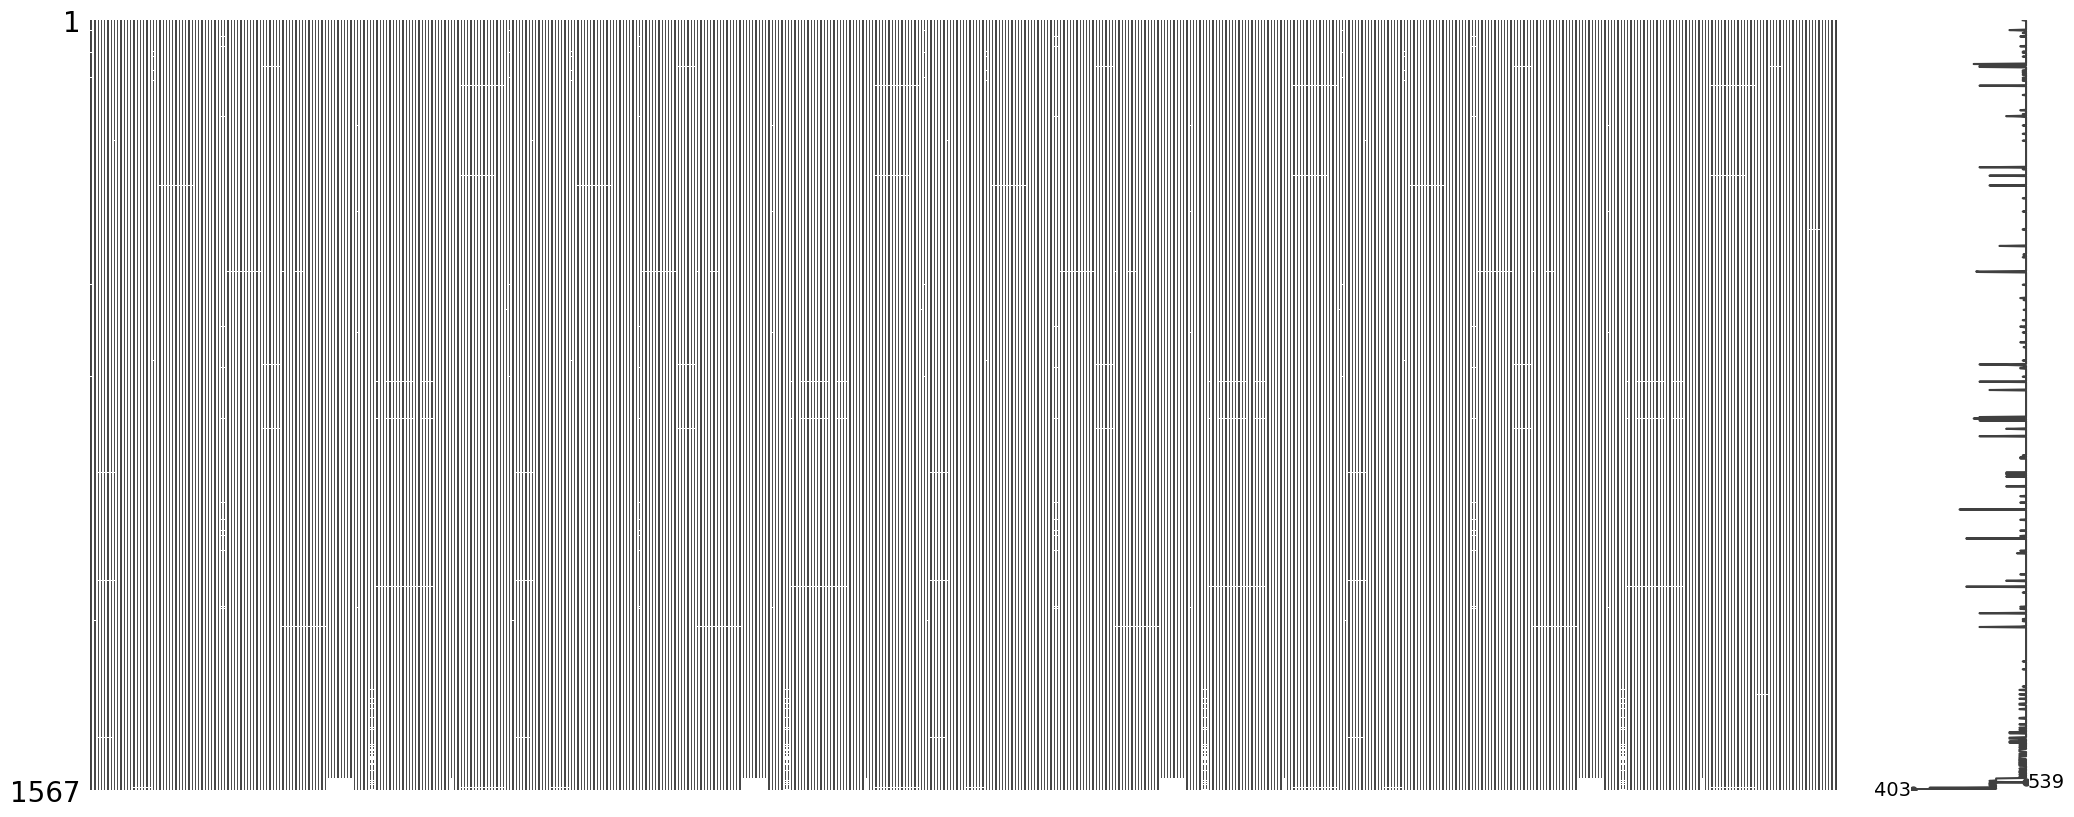

In [25]:
# Check for missing values
print(secom_data_cleaned.isna().sum().sum(), "missing values found")

msno.matrix(secom_data_cleaned)

In [26]:
# Calculate the percentage of missing values for each column
missing_percentage_cleaned = (secom_data_cleaned.isnull().sum() / len(secom_data_cleaned)) * 100

# Convert to a DataFrame
missing_df_cleaned = pd.DataFrame({'Column': missing_percentage_cleaned.index, 
                                   'Missing Percentage': missing_percentage_cleaned.values})

# Sort and display
missing_df_cleaned = missing_df_cleaned.sort_values(by='Missing Percentage', ascending=False)

display(missing_df_cleaned)

,Column,Missing Percentage
86,feature_89,3.254627
215,feature_225,3.254627
473,feature_497,3.254627
343,feature_362,3.254627
344,feature_363,3.254627
...,...,...
238,feature_252,0.000000
237,feature_251,0.000000
236,feature_250,0.000000
235,feature_249,0.000000


## Apply Median imputation

In [27]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load or redefine secom_data (modify this if needed)
# secom_data = pd.read_csv("path_to_your_data.csv")

# Drop columns with more than 10% missing data
threshold = 10  
missing_percentage = (secom_data.isnull().sum() / len(secom_data)) * 100
columns_to_drop = missing_percentage[missing_percentage > threshold].index
secom_data_cleaned = secom_data.drop(columns=columns_to_drop)

# Apply median imputation
median_imputer = SimpleImputer(strategy="median")
secom_data_imputed = pd.DataFrame(median_imputer.fit_transform(secom_data_cleaned), 
                                  columns=secom_data_cleaned.columns)

# Display the first few rows
print(secom_data_imputed.head())

# Save the imputed dataset (optional)
# secom_data_imputed.to_csv("secom_data_imputed.csv", index=False)


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602      100.0   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294      100.0   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102      100.0   
3    2988.72    2479.90  2199.0333   909.7926     1.3204      100.0   
4    3032.24    2502.87  2233.3667  1326.5200     1.5334      100.0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_577  feature_582  \
0    97.6133     0.1242     1.5005     0.0162  ...      14.9509       0.5005   
1   102.3433     0.1247     1.4966    -0.0005  ...      10.9003       0.5019   
2    95.4878     0.1241     1.4436     0.0041  ...       9.2721       0.4958   
3   104.2367     0.1217     1.4882    -0.0124  ...       8.5831       0.4990   
4   100.3967     0.1235     1.5031    -0.0031  ...      10.9698       0.4800   

   feature_583  feature_584  feature_585  feature_586  feature_587  \
0       0.0118       0

0 missing values found


<AxesSubplot:>

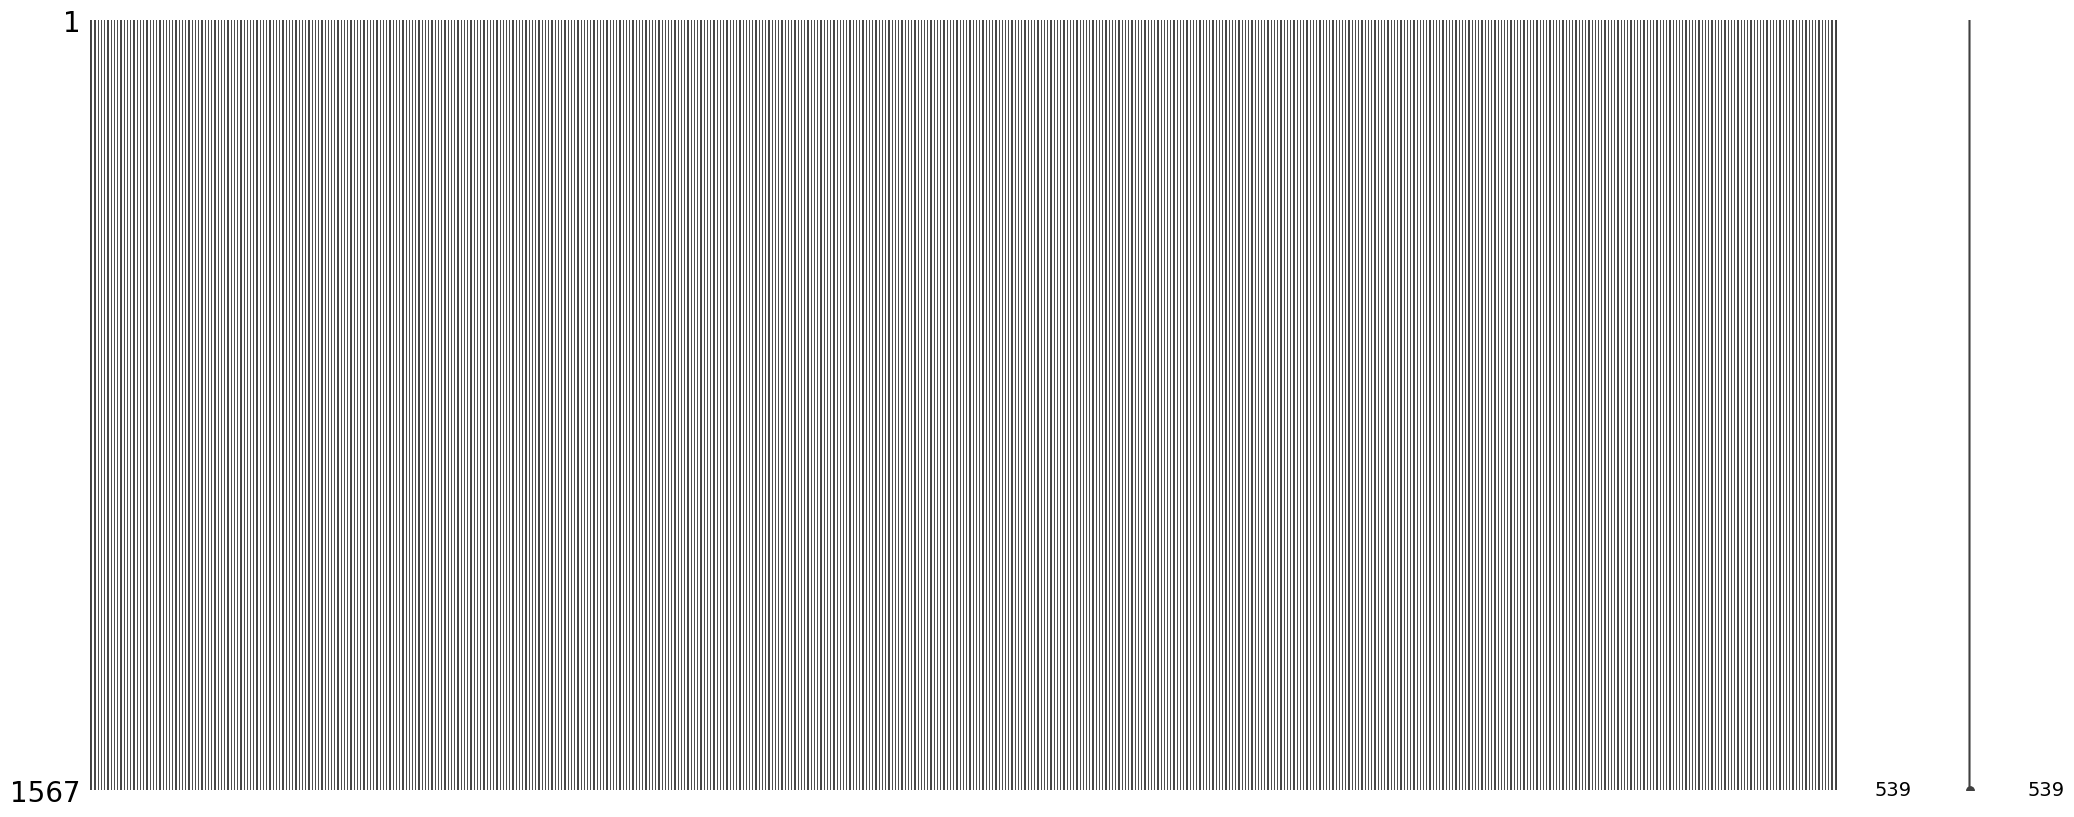

In [28]:
print(secom_data_imputed.isna().sum().sum(), "missing values found")

msno.matrix(secom_data_imputed)

### Write secom_median_impute to csv

In [29]:
secom_data_imputed.to_csv('../secom/secom_median_imputed', index=False)

In [48]:
# Calculate the percentage of missing values for each column
missing_percentage_imputed = (secom_data_imputed.isnull().sum() / len(secom_data_imputed)) * 100

# Convert to a DataFrame
missing_df_imputed = pd.DataFrame({'Column': missing_percentage_imputed.index, 
                                   'Missing Percentage': missing_percentage_imputed.values})

# Sort and display
missing_df_imputed = missing_df_imputed.sort_values(by='Missing Percentage', ascending=False)

display(missing_df_imputed)

,Column,Missing Percentage
0,feature_0,0.0
354,feature_373,0.0
368,feature_391,0.0
367,feature_390,0.0
366,feature_389,0.0
...,...,...
174,feature_183,0.0
173,feature_182,0.0
172,feature_181,0.0
171,feature_180,0.0


## use MICE to impute the rest of missing data

In [38]:
'''
df to be imputed is secom_data_cleaned (same used for median imputaion)
median imputed df is named secom_data_imputed
name MICE imputed df secom_data_MICE
after imputation, write imputed df to csv at '../secom/'
'''

# Create an instance of sklearn IterativeImputer (MICE) with updates 1
mice_imputer = IterativeImputer(max_iter=10, random_state=42, verbose=1)

# Fit data
mice_imputer.fit(secom_data_cleaned)
# Apply MICE imputation transformation of secom_data_cleaned
secom_data_MICE = mice_imputer.transform(secom_data_cleaned)

'''
# Use tqdm to show progress for each iteration
for i in tqdm(range(imputer.max_iter), desc="Imputation Progress"):
    imputer.fit_transform(df)
'''

'''
# use tqdm for progress bar during application of MICE imputation
with tqdm(total=mice_imputer.max_iter, desc="Imputing Data", unit="iteration") as pbar:
    # Iteratively apply imputation with progress bar update
    for _ in range(mice_imputer.max_iter):
        # Fit and transform data during each iteration
        secom_data_MICE = mice_imputer.fit_transform(secom_data_cleaned)
        
        # Update the progress bar after each iteration
        pbar.update(1)
'''

# Display the imputed dataset
display(secom_data_MICE)

[IterativeImputer] Completing matrix with shape (1567, 539)
[IterativeImputer] Change: 1049.2503907564526, scaled tolerance: 37.943 
[IterativeImputer] Change: 335.84260029189863, scaled tolerance: 37.943 
[IterativeImputer] Change: 203.36397922304286, scaled tolerance: 37.943 
[IterativeImputer] Change: 179.22229637749373, scaled tolerance: 37.943 
[IterativeImputer] Change: 197.59557549404477, scaled tolerance: 37.943 
[IterativeImputer] Change: 220.94761813322646, scaled tolerance: 37.943 
[IterativeImputer] Change: 241.5112604801359, scaled tolerance: 37.943 
[IterativeImputer] Change: 258.1736093658065, scaled tolerance: 37.943 
[IterativeImputer] Change: 271.35886501236024, scaled tolerance: 37.943 
[IterativeImputer] Change: 281.6964134851111, scaled tolerance: 37.943 


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (1567, 539)


array([[3.03093000e+03, 2.56400000e+03, 2.18773330e+03, ...,
        5.13808089e-03, 1.00525349e+02, 1.00000000e+00],
       [3.09578000e+03, 2.46514000e+03, 2.23042220e+03, ...,
        6.00000000e-03, 2.08204500e+02, 1.00000000e+00],
       [2.93261000e+03, 2.55994000e+03, 2.18641110e+03, ...,
        1.48000000e-02, 8.28602000e+01, 0.00000000e+00],
       ...,
       [2.97881000e+03, 2.37978000e+03, 2.20630000e+03, ...,
        2.50000000e-03, 4.35231000e+01, 1.00000000e+00],
       [2.89492000e+03, 2.53201000e+03, 2.17703330e+03, ...,
        7.50000000e-03, 9.34941000e+01, 1.00000000e+00],
       [2.94492000e+03, 2.45076000e+03, 2.19544440e+03, ...,
        4.50000000e-03, 1.37784400e+02, 1.00000000e+00]])

In [27]:
secom_data_MICE = pd.read_csv('../secom/secom_MICE_imputed')


secom_data_MICE

,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,538
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021247,0.015558,0.005138,100.525349,1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,0.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,1.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,1.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.456139,-0.001322,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,1.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,1.0


In [28]:
secom_data_MICE.columns = secom_data_cleaned.columns

secom_data_MICE

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021247,0.015558,0.005138,100.525349,1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,0.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,1.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,1.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.456139,-0.001322,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,1.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,1.0


In [30]:
secom_data_MICE['Label'] = secom_data_MICE['Label'].astype(int)

secom_data_MICE

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021247,0.015558,0.005138,100.525349,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.456139,-0.001322,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,1


In [32]:
# Convert labels: -1 (pass) -> 0, 1 (fail) -> 0
secom_data_MICE["Label"] = secom_data_MICE["Label"].replace({1: 0, 0:1 })

secom_data_MICE

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021247,0.015558,0.005138,100.525349,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.456139,-0.001322,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,0


### Write secom_data_MICE to csv

In [33]:
secom_data_MICE.to_csv('../secom/secom_MICE_imputed', index=False)